In [1]:
import skimage.io
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
GT_DIR = 'public_data/02_gt/'
INPUT_DIR = 'public_data/02_input/'

In [55]:
print('gt:\n', pd.read_csv('public_data/03_gt/gt.csv'))
print('g_coord:\n', pd.read_csv('public_data/03_input/g_coord.csv'))

gt:
 Empty DataFrame
Columns: [img.png, 240, 149, 623, 149.1, 1006, 146, 5]
Index: []
g_coord:
 Empty DataFrame
Columns: [623, 149]
Index: []


In [107]:
image = skimage.io.imread('public_data/03_input/img.png')

In [56]:
align(image, [623, 149])

(array([[247, 246, 246, ..., 249, 248, 248],
        [249, 248, 245, ..., 247, 246, 248],
        [247, 248, 248, ..., 248, 249, 249],
        ...,
        [248, 247, 247, ..., 249, 248, 249],
        [248, 249, 247, ..., 249, 249, 249],
        [249, 249, 249, ..., 249, 246, 247]], dtype=uint8),
 [250, 164],
 [1026, 164])

In [51]:
delta_gr_h_best

5

In [52]:
W

388

In [53]:
623 - 388 + 5

240

In [36]:
im_red = image[:W].astype(np.float32) / 255
im_green = image[W: W * 2].astype(np.float32) / 255
im_blue = image[W * 2: W * 3].astype(np.float32) / 255

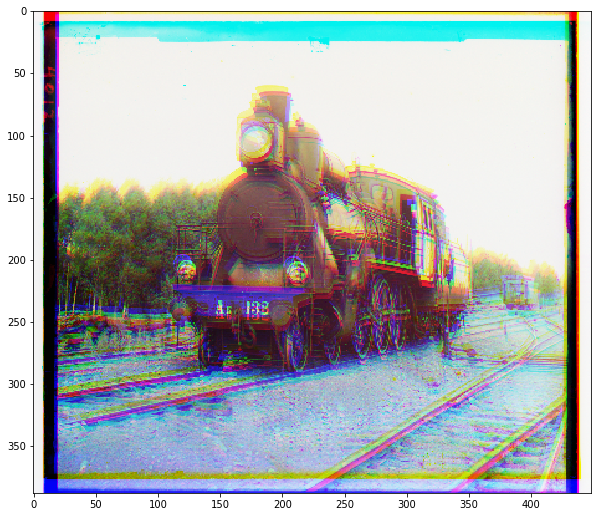

In [37]:
plt.figure(figsize=(10, 10))
color_im = np.array([im_red.T, im_green.T, im_blue.T])
plt.imshow(color_im.transpose())

In [38]:
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

In [39]:
def cross_entropy(image1, image2):
    return np.sum(image1 * image2) / np.sqrt(np.sum(image1 ** 2) * np.sum(image2 ** 2))

In [40]:
h, w = im_red.shape
h_to_cut, w_to_cut = h // 20, w // 20

im_red = im_red[h_to_cut: -h_to_cut, w_to_cut: -w_to_cut]
im_green = im_green[h_to_cut: -h_to_cut, w_to_cut: -w_to_cut]
im_blue = im_blue[h_to_cut: -h_to_cut, w_to_cut: -w_to_cut]

In [10]:
def move(first_picture, second_picture, delta_h, delta_w):
    #print('first shape: {}, second shape: {}, delta_h = {}, delta_w = {}'.format(first_picture.shape, 
    #                                                                             second_picture.shape, 
    #                                                                            delta_h, delta_w))
    h, w = first_picture.shape
    if delta_h >= 0 and delta_w >= 0:
        first_new = first_picture[delta_h:, delta_w:]
        second_new = second_picture[:h-delta_h, :w-delta_w]
        #print('case 1, first shape: {}, second shape: {}'.format(first_new.shape, second_new.shape))
    elif delta_h < 0 and delta_w >= 0:
        first_new = first_picture[:delta_h, delta_w:]
        second_new = second_picture[-delta_h:, :w-delta_w]
        #print('case 2, first shape: {}, second shape: {}'.format(first_new.shape, second_new.shape))
    elif delta_h >= 0 and delta_w < 0:
        first_new = first_picture[delta_h:, :delta_w]
        second_new = second_picture[:h-delta_h, -delta_w:]
        #print('case 3, first shape: {}, second shape: {}'.format(first_new.shape, second_new.shape))
    elif delta_h < 0 and delta_w < 0:
        first_new = first_picture[:delta_h, :delta_w]
        second_new = second_picture[-delta_h:, -delta_w:]
        #print('case 4, first shape: {}, second shape: {}'.format(first_new.shape, second_new.shape))
    return first_new, second_new

In [41]:
mse_gr_best, delta_gr_h_best, delta_gr_w_best = 1e10, 0, 0
im_red_best, im_green_r_best = im_red, im_green

for delta_h in range(-15, 16):
    for delta_w in range(-15, 16):
        im_red_new, im_green_new = move(im_red, im_green, delta_h, delta_w)
        mse_curr = mse(im_red_new, im_green_new)
        if mse_curr < mse_gr_best:
            mse_gr_best = mse_curr
            print(mse_curr, delta_h, delta_w)
            delta_gr_h_best, delta_gr_w_best = delta_h, delta_w
            im_red_best, im_green_r_best = im_red_new, im_green_new

0.057394546 -15 -15
0.057289217 -15 -14
0.057076238 -15 -13
0.056865294 -15 -12
0.05662436 -15 -11
0.05629878 -15 -10
0.05601806 -15 -9
0.05585656 -15 -8
0.055631205 -15 -7
0.055449527 -15 -6
0.055406366 -15 -4
0.055346802 -15 -3
0.05532855 -15 -1
0.055245697 -15 0
0.055177577 -15 1
0.055172533 -15 2
0.055048678 -14 -10
0.05477302 -14 -9
0.054569297 -14 -8
0.05430628 -14 -7
0.054095853 -14 -6
0.05403838 -14 -5
0.05398154 -14 -4
0.053909525 -14 -3
0.053871013 -14 -2
0.053867828 -14 0
0.053853065 -14 1
0.053850994 -14 2
0.053808913 -13 -10
0.05350942 -13 -9
0.053256784 -13 -8
0.05295401 -13 -7
0.052716296 -13 -6
0.05263439 -13 -5
0.05252191 -13 -4
0.052473422 -13 -3
0.052465156 -13 -2
0.052424494 -13 1
0.052128673 -12 -9
0.051944118 -12 -8
0.051642425 -12 -7
0.051406212 -12 -6
0.05133872 -12 -5
0.051203184 -12 -4
0.051132873 -12 -3
0.051048722 -11 -9
0.05083063 -11 -8
0.0505001 -11 -7
0.0502638 -11 -6
0.05018701 -11 -5
0.050085276 -11 -4
0.049962334 -11 -3
0.04989147 -10 -8
0.049557157 -

In [42]:
mse_gb_best, delta_gb_h_best, delta_gb_w_best = 1e10, 0, 0
im_blue_best, im_green_b_best = im_blue, im_green

for delta_h in range(-15, 16):
    for delta_w in range(-15, 16):
        im_blue_new, im_green_new = move(im_blue, im_green, delta_h, delta_w)
        mse_curr = mse(im_blue_new, im_green_new)
        if mse_curr < mse_gb_best:
            mse_gb_best = mse_curr
            print(mse_curr, delta_h, delta_w)
            delta_gb_h_best, delta_gb_w_best = delta_h, delta_w
            im_blue_best, im_green_b_best = im_blue_new, im_green_new

0.039622534 -15 -15
0.03905683 -15 -14
0.038575504 -15 -13
0.038152568 -15 -12
0.03765091 -15 -11
0.03703388 -15 -10
0.03660706 -15 -9
0.036172695 -15 -8
0.035636548 -15 -7
0.03533947 -15 -6
0.034966726 -15 -5
0.034500945 -15 -4
0.034096964 -15 -3
0.033731878 -14 -5
0.033181056 -14 -4
0.032704722 -14 -3
0.032569017 -13 -5
0.032014914 -13 -4
0.0314796 -13 -3
0.03147755 -12 -5
0.030832523 -12 -4
0.030219886 -12 -3
0.029803155 -11 -4
0.029047504 -11 -3
0.028575186 -10 -4
0.027781038 -10 -3
0.027201356 -9 -4
0.026282666 -9 -3
0.025558017 -8 -4
0.024438754 -8 -3
0.023430241 -7 -4
0.022103518 -7 -3
0.020557575 -6 -4
0.018816125 -6 -3
0.0158253 -5 -4
0.013434546 -5 -3


In [43]:
im_red_best_moved, _ = move(im_red_best, im_green_r_best, 
                            -delta_gb_h_best, 
                            -delta_gb_w_best) 
im_green_best_moved, _ = move(im_green_r_best, im_red_best,
                                -delta_gb_h_best, 
                                -delta_gb_w_best)
im_blue_best_moved, _ = move(im_blue_best, im_green_b_best,
                             -delta_gr_h_best, 
                             -delta_gr_w_best)

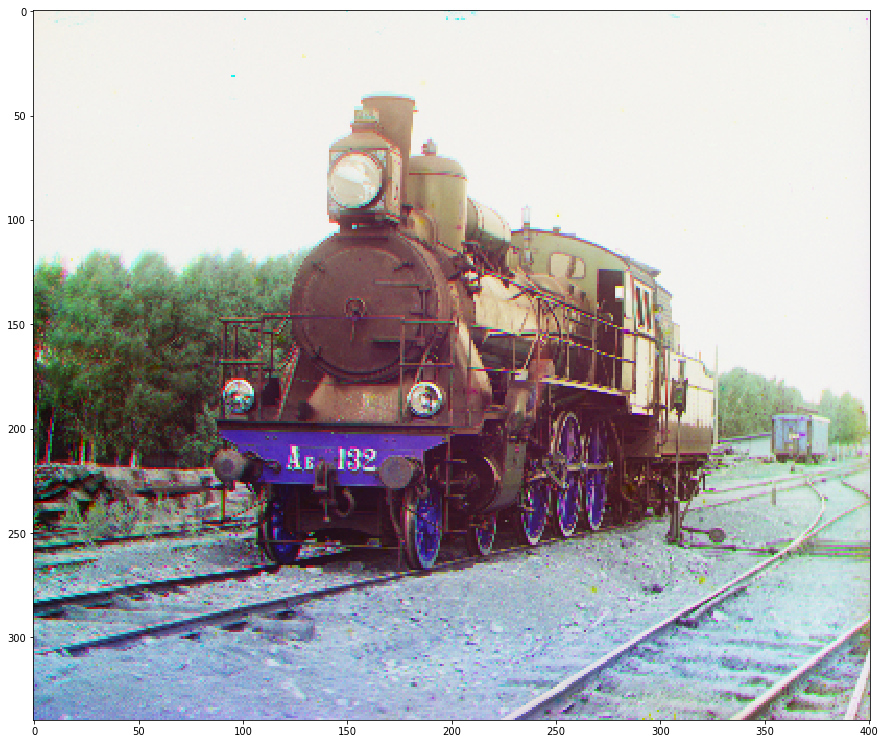

In [44]:
plt.figure(figsize=(15, 15))
color_im = np.array([im_red_best_moved.T, im_green_best_moved.T, im_blue_best_moved.T])
plt.imshow(color_im.transpose())

In [120]:
import skimage.io, skimage.transform
import numpy as np


def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)


def cross_entropy(image1, image2):
    return np.sum(image1 * image2) / np.sqrt(np.sum(image1 ** 2) * np.sum(image2 ** 2))


def move(first_picture, second_picture, delta_h, delta_w):
    h, w = first_picture.shape
    if delta_h >= 0 and delta_w >= 0:
        first_new = first_picture[delta_h:, delta_w:]
        second_new = second_picture[:h-delta_h, :w-delta_w]
    elif delta_h < 0 and delta_w >= 0:
        first_new = first_picture[:delta_h, delta_w:]
        second_new = second_picture[-delta_h:, :w-delta_w]
    elif delta_h >= 0 and delta_w < 0:
        first_new = first_picture[delta_h:, :delta_w]
        second_new = second_picture[:h-delta_h, -delta_w:]
    elif delta_h < 0 and delta_w < 0:
        first_new = first_picture[:delta_h, :delta_w]
        second_new = second_picture[-delta_h:, -delta_w:]
    return first_new, second_new


def pyramid_align_pair(first, second):
    if np.max(first.shape) < 500:
        return align_pair(first, second)
    else:
        add = 2 * pyramid_align_pair(
            skimage.transform.rescale(first, 0.5, mode="reflect"),
            skimage.transform.rescale(second, 0.5, mode="reflect")
        )
        _, _, delta_h, delta_w = align_pair(np.roll(np.roll(first, add[2], axis=0), add[3], axis=1), second, 5)
        return add[0], add[1], add[2] + delta_h, delta_w


def align_pair(first, second, step=15):
    mse_best, delta_h_best, delta_w_best = 1e10, 0, 0
    first_best, second_best = first, second

    for delta_h in range(-step, step + 1):
        for delta_w in range(-step, step + 1):
            first_curr, second_curr = move(first, second, delta_h, delta_w)
            mse_curr = mse(first_curr, second_curr)
            if mse_curr < mse_best:
                mse_best = mse_curr
                delta_h_best, delta_w_best = delta_h, delta_w
                first_best, second_best = first_curr, second_curr

    return first_best, second_best, delta_h_best, delta_w_best


def align(img, g_coord):
    W = img.shape[0] // 3
    print(W)
    im_red = img[:W].astype(np.float32) / 255
    im_green = img[W: W * 2].astype(np.float32) / 255
    im_blue = img[W * 2: W * 3].astype(np.float32) / 255

    h, w = im_red.shape
    h_to_cut, w_to_cut = h // 10, w // 10

    im_red = im_red[h_to_cut: -h_to_cut, w_to_cut: -w_to_cut]
    im_green = im_green[h_to_cut: -h_to_cut, w_to_cut: -w_to_cut]
    im_blue = im_blue[h_to_cut: -h_to_cut, w_to_cut: -w_to_cut]

    im_red_best, im_green_r_best, delta_r_h_best, delta_r_w_best = pyramid_align_pair(im_red, im_green)
    im_blue_best, im_blue_r_best, delta_b_h_best, delta_b_w_best = pyramid_align_pair(im_blue, im_green)

    r_coord = [g_coord[0] - W + delta_r_h_best, g_coord[1] + delta_r_w_best]
    b_coord = [g_coord[0] + W + delta_b_h_best, g_coord[1] + delta_b_w_best]
    print(delta_r_h_best, delta_r_w_best, delta_b_h_best, delta_b_w_best)
    return img, r_coord, b_coord

In [121]:
print('gt:\n', pd.read_csv('public_data/05_gt/gt.csv'))
print('g_coord:\n', pd.read_csv('public_data/05_input/g_coord.csv'))

gt:
 Empty DataFrame
Columns: [img.png, 110, 241, 494, 238, 875, 236, 5]
Index: []
g_coord:
 Empty DataFrame
Columns: [494, 238]
Index: []


In [122]:
align(image, [494, 238])

388
5 1 -5 -3


(array([[247, 246, 246, ..., 249, 248, 248],
        [249, 248, 245, ..., 247, 246, 248],
        [247, 248, 248, ..., 248, 249, 249],
        ...,
        [248, 247, 247, ..., 249, 248, 249],
        [248, 249, 247, ..., 249, 249, 249],
        [249, 249, 249, ..., 249, 246, 247]], dtype=uint8),
 [111, 239],
 [877, 235])

In [95]:
image.shape

(43, 50)

In [96]:
def roll(image, hh, ww):
    return np.roll(np.roll(image, hh, axis=0), ww, axis=1)

In [97]:
roll(image, 1, 0)

array([[0.41353258, 0.45622366, 0.50419774, ..., 0.71299235, 0.79262382,
        0.75785217],
       [0.94418141, 0.92702249, 0.92758318, ..., 0.9524242 , 0.95129955,
        0.94158911],
       [0.94669855, 0.94974252, 0.94714325, ..., 0.95534057, 0.95138413,
        0.9481864 ],
       ...,
       [0.54791971, 0.55599767, 0.49458695, ..., 0.55918803, 0.60873716,
        0.67620849],
       [0.47954269, 0.49325631, 0.48727441, ..., 0.57306114, 0.63043801,
        0.78483125],
       [0.42735589, 0.46408781, 0.46193034, ..., 0.62806209, 0.6750783 ,
        0.79353929]])